In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
from sklearn.model_selection import train_test_split
import plotly
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', 255)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score , f1_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#PCA T-SNE, PLS_DA, LDA, DB-SCAN --> Preprocessing

In [3]:
df = pd.read_pickle(r'Result.pkl')

In [186]:
df = df.dropna()
df = df.reset_index(drop=True)

In [187]:
target = 'PN_155152002_Result_Meas_RunOut'

In [188]:
df.shape

(2105081, 32)

In [189]:
df['PartStatus'] = np.where((df[target] <= 0.6), 'OK', 'NOK') #-2.9

In [191]:
import imblearn

In [192]:
df =  df.drop('PN_155152002_ResultDate',axis = 1)
df =  df.drop('PN_155152002_Result_Meas_RunOut',axis = 1)
df =  df.drop('RunOut_x',axis = 1)
df =  df.drop('RunOut_y',axis = 1)

In [193]:
df = pd.get_dummies(df, columns = ['PN_133401031_SeriesLine'])

In [194]:
target = 'PartStatus'

In [195]:
df[target] = pd.Categorical(df[target])

In [197]:
df['PartStatus'] = np.where((df['PartStatus'] == "OK"), 0, 1) #-2.9

In [198]:
features = ['PN_133351034_Result_Welding_Force_MeasCurveMax',
       'PN_133351034_Result_Welding_Force_MeasCurveMin',
       'PN_133351034_Result_WeldingExtended_Force_Centering',
       'PN_133351034_Result_WeldingExtended_Force_Initial',
       'PN_133401031_Result_LaserForming_AlignVecBeforeLaser',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleAbsDevPartCalc',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleConcentricityCalc',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleMaxDevAlpha',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleMaxDevBeta',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleMaxDevGamma',
       'PN_133401031_Result_LaserForming_BeforeLaserMaxDevAlpha',
       'PN_133401031_Result_LaserForming_BeforeLaserMaxDevBeta',
       'PN_133401031_Result_LaserForming_BeforeLaserMaxDevGamma',
       'PN_133401031_Result_LaserForming_BeforeLaserValueConcentricityCalc',
       'PN_133401031_Result_LaserForming_BeforeLaserXdeviation',
       'PN_133401031_Result_LaserForming_BeforeLaserYdeviation',
       'PN_133401031_Result_LaserForming_LaserOutputPower',
       'PN_133401031_Result_LaserForming_StartAngleLaserOutput',
       'PN_155152002_Result_Meas_Angle', 'c_1.0', 'c_2.0', 'c_3.0', 'c_4.0',
       'c_5.0', 'c_6.0', 'c_7.0', 'c_8.0',
       'PN_133401031_SeriesLine_SL10_31', 'PN_133401031_SeriesLine_SL10_32']

In [199]:
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,target].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [200]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
# define dataset

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 2104988, 1: 93})
Counter({0: 2104988, 1: 2104988})


In [201]:
regr_pls = PLSRegression(n_components=19)
PLS_score=regr_pls.fit_transform(x,y)
PLS_loads=regr_pls.x_loadings_

In [202]:
regr_pls.x_scores_

array([[-2.81, -0.8 , -0.6 , ..., -1.09,  1.04, -0.38],
       [-0.16, -0.17, -0.38, ..., -0.79, -0.87,  0.73],
       [-3.54, -0.83, -0.76, ..., -0.93,  0.03,  0.22],
       ...,
       [ 2.23, -0.93,  1.17, ..., -0.16, -0.6 ,  0.17],
       [ 0.85, -0.12,  0.32, ..., -1.31,  1.15, -0.63],
       [ 1.54,  0.54, -1.75, ...,  0.17, -0.47,  0.42]])

In [203]:
regr_pls.x_scores_.shape[1]

19

In [204]:
pls_components = []
for i in range(regr_pls.x_scores_.shape[1]):
    pls_components.append('PLS_DA_'+str(i+1))

In [205]:
scores = pd.DataFrame(regr_pls.x_scores_,columns =pls_components)

In [206]:
scores

,PLS_DA_1,PLS_DA_2,PLS_DA_3,PLS_DA_4,PLS_DA_5,PLS_DA_6,PLS_DA_7,PLS_DA_8,PLS_DA_9,PLS_DA_10,PLS_DA_11,PLS_DA_12,PLS_DA_13,PLS_DA_14,PLS_DA_15,PLS_DA_16,PLS_DA_17,PLS_DA_18,PLS_DA_19
0,-2.811622,-0.798035,-0.598132,-0.780940,0.656088,-1.812553,0.029082,0.040206,-0.087964,-0.011731,0.267666,1.223485,-0.186628,0.073524,0.011062,1.074612,-1.093432,1.035132,-0.376377
1,-0.158094,-0.167673,-0.381398,-3.520741,0.023957,-1.713988,0.243017,-1.901353,-0.152598,0.423300,1.502003,-2.285421,-2.277600,2.912381,0.345235,1.326790,-0.791590,-0.869639,0.731161
2,-3.536937,-0.828307,-0.759167,0.287669,1.610967,-1.334207,0.308825,0.031124,-0.263224,0.499132,0.455668,0.739905,-0.423208,0.332462,0.273197,0.775928,-0.932235,0.032380,0.224908
3,0.068721,1.222013,0.692062,-3.460480,-0.223645,-0.588195,-0.856573,-0.753598,0.423038,0.356859,0.347605,-2.748553,-1.852608,-0.286756,1.239166,0.831734,-1.576936,-1.240235,-1.136561
4,-2.774569,-0.422568,0.448279,-2.046012,0.797943,-1.242132,0.692964,0.423423,0.005122,0.023553,0.540635,0.747462,-0.867687,1.422748,1.747959,1.091567,1.236493,1.399792,0.572420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209971,-2.398471,0.227960,-0.920439,1.116093,0.498384,-0.891337,-0.214975,-0.012698,0.364739,0.075194,0.395454,-0.275111,-0.038948,-0.784146,0.122406,-0.768503,0.474194,0.190024,0.426468
4209972,1.358707,-0.315470,-2.053715,-0.659669,-0.048495,0.113537,0.826055,0.313548,-0.581507,0.228434,-0.420248,1.735162,0.216512,-0.043019,0.320641,0.955652,0.249651,-0.572447,0.283010
4209973,2.226354,-0.932044,1.173890,1.598506,-0.291265,-0.873638,0.287658,0.089149,-1.105622,0.229715,-0.035610,-0.688790,-0.154485,-0.188609,-0.248311,0.309677,-0.156877,-0.595901,0.170887
4209974,0.851907,-0.118652,0.316953,-0.382470,-1.224121,0.563021,-0.627354,-0.162999,0.280004,-0.533042,-0.299924,1.370299,0.277517,0.341979,0.181377,-0.645637,-1.311006,1.152075,-0.634488


In [207]:
y = pd.DataFrame(y , columns = ["PartStatus"])

In [208]:
finalDf_lsp = pd.concat([scores, y], axis = 1)

In [209]:
y.shape

(4209976, 1)

In [210]:
finalDf_lsp.PartStatus.value_counts()

0    2104988
1    2104988
Name: PartStatus, dtype: int64

In [211]:
finalDf_lsp = finalDf_lsp.dropna()
finalDf_lsp = finalDf_lsp.reset_index(drop=True)

import plotly.express as px
fig = px.scatter_3d(finalDf_lsp, x='PLS_DA_1', y='PLS_DA_2', z='PLS_DA_3',
              color='PartStatus',size_max=6, opacity=0.4,
                   
                   
                   )

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-6,5],),
                     yaxis = dict(nticks=4, range=[-5,5],),
                     zaxis = dict(nticks=4, range=[-5,10],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

In [212]:
X = finalDf_lsp.loc[:, finalDf_lsp.columns != 'PartStatus']
y = finalDf_lsp.loc[:, finalDf_lsp.columns == 'PartStatus']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
columns = X_train.columns

In [214]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [215]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[603919,  27578],
       [ 28204, 603292]], dtype=int64)

In [216]:
finalDf_lsp

,PLS_DA_1,PLS_DA_2,PLS_DA_3,PLS_DA_4,PLS_DA_5,PLS_DA_6,PLS_DA_7,PLS_DA_8,PLS_DA_9,PLS_DA_10,PLS_DA_11,PLS_DA_12,PLS_DA_13,PLS_DA_14,PLS_DA_15,PLS_DA_16,PLS_DA_17,PLS_DA_18,PLS_DA_19,PartStatus
0,-2.811622,-0.798035,-0.598132,-0.780940,0.656088,-1.812553,0.029082,0.040206,-0.087964,-0.011731,0.267666,1.223485,-0.186628,0.073524,0.011062,1.074612,-1.093432,1.035132,-0.376377,0
1,-0.158094,-0.167673,-0.381398,-3.520741,0.023957,-1.713988,0.243017,-1.901353,-0.152598,0.423300,1.502003,-2.285421,-2.277600,2.912381,0.345235,1.326790,-0.791590,-0.869639,0.731161,0
2,-3.536937,-0.828307,-0.759167,0.287669,1.610967,-1.334207,0.308825,0.031124,-0.263224,0.499132,0.455668,0.739905,-0.423208,0.332462,0.273197,0.775928,-0.932235,0.032380,0.224908,0
3,0.068721,1.222013,0.692062,-3.460480,-0.223645,-0.588195,-0.856573,-0.753598,0.423038,0.356859,0.347605,-2.748553,-1.852608,-0.286756,1.239166,0.831734,-1.576936,-1.240235,-1.136561,0
4,-2.774569,-0.422568,0.448279,-2.046012,0.797943,-1.242132,0.692964,0.423423,0.005122,0.023553,0.540635,0.747462,-0.867687,1.422748,1.747959,1.091567,1.236493,1.399792,0.572420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209971,-2.398471,0.227960,-0.920439,1.116093,0.498384,-0.891337,-0.214975,-0.012698,0.364739,0.075194,0.395454,-0.275111,-0.038948,-0.784146,0.122406,-0.768503,0.474194,0.190024,0.426468,1
4209972,1.358707,-0.315470,-2.053715,-0.659669,-0.048495,0.113537,0.826055,0.313548,-0.581507,0.228434,-0.420248,1.735162,0.216512,-0.043019,0.320641,0.955652,0.249651,-0.572447,0.283010,1
4209973,2.226354,-0.932044,1.173890,1.598506,-0.291265,-0.873638,0.287658,0.089149,-1.105622,0.229715,-0.035610,-0.688790,-0.154485,-0.188609,-0.248311,0.309677,-0.156877,-0.595901,0.170887,1
4209974,0.851907,-0.118652,0.316953,-0.382470,-1.224121,0.563021,-0.627354,-0.162999,0.280004,-0.533042,-0.299924,1.370299,0.277517,0.341979,0.181377,-0.645637,-1.311006,1.152075,-0.634488,1


In [217]:
pls_loading = pd.DataFrame(data=regr_pls.x_scores_ )

In [218]:
pls_loading.columns = pls_components

In [219]:
df.columns

Index(['PN_133351034_Result_Welding_Force_MeasCurveMax',
       'PN_133351034_Result_Welding_Force_MeasCurveMin',
       'PN_133351034_Result_WeldingExtended_Force_Centering',
       'PN_133351034_Result_WeldingExtended_Force_Initial',
       'PN_133401031_Result_LaserForming_AlignVecBeforeLaser',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleAbsDevPartCalc',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleConcentricityCalc',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleMaxDevAlpha',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleMaxDevBeta',
       'PN_133401031_Result_LaserForming_BeforeLaserAngleMaxDevGamma',
       'PN_133401031_Result_LaserForming_BeforeLaserMaxDevAlpha',
       'PN_133401031_Result_LaserForming_BeforeLaserMaxDevBeta',
       'PN_133401031_Result_LaserForming_BeforeLaserMaxDevGamma',
       'PN_133401031_Result_LaserForming_BeforeLaserValueConcentricityCalc',
       'PN_133401031_Result_LaserForming_BeforeLaserXdeviation',

In [220]:
df_pls_partstatus = pls_loading.join(y)

In [221]:
#df_pca_partstatus = df_pca_partstatus.join(df_meta['PN_155152002_Result_Meas_RunOut'])

In [222]:
df_pls_partstatus

,PLS_DA_1,PLS_DA_2,PLS_DA_3,PLS_DA_4,PLS_DA_5,PLS_DA_6,PLS_DA_7,PLS_DA_8,PLS_DA_9,PLS_DA_10,PLS_DA_11,PLS_DA_12,PLS_DA_13,PLS_DA_14,PLS_DA_15,PLS_DA_16,PLS_DA_17,PLS_DA_18,PLS_DA_19,PartStatus
0,-2.811622,-0.798035,-0.598132,-0.780940,0.656088,-1.812553,0.029082,0.040206,-0.087964,-0.011731,0.267666,1.223485,-0.186628,0.073524,0.011062,1.074612,-1.093432,1.035132,-0.376377,0
1,-0.158094,-0.167673,-0.381398,-3.520741,0.023957,-1.713988,0.243017,-1.901353,-0.152598,0.423300,1.502003,-2.285421,-2.277600,2.912381,0.345235,1.326790,-0.791590,-0.869639,0.731161,0
2,-3.536937,-0.828307,-0.759167,0.287669,1.610967,-1.334207,0.308825,0.031124,-0.263224,0.499132,0.455668,0.739905,-0.423208,0.332462,0.273197,0.775928,-0.932235,0.032380,0.224908,0
3,0.068721,1.222013,0.692062,-3.460480,-0.223645,-0.588195,-0.856573,-0.753598,0.423038,0.356859,0.347605,-2.748553,-1.852608,-0.286756,1.239166,0.831734,-1.576936,-1.240235,-1.136561,0
4,-2.774569,-0.422568,0.448279,-2.046012,0.797943,-1.242132,0.692964,0.423423,0.005122,0.023553,0.540635,0.747462,-0.867687,1.422748,1.747959,1.091567,1.236493,1.399792,0.572420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209971,-2.398471,0.227960,-0.920439,1.116093,0.498384,-0.891337,-0.214975,-0.012698,0.364739,0.075194,0.395454,-0.275111,-0.038948,-0.784146,0.122406,-0.768503,0.474194,0.190024,0.426468,1
4209972,1.358707,-0.315470,-2.053715,-0.659669,-0.048495,0.113537,0.826055,0.313548,-0.581507,0.228434,-0.420248,1.735162,0.216512,-0.043019,0.320641,0.955652,0.249651,-0.572447,0.283010,1
4209973,2.226354,-0.932044,1.173890,1.598506,-0.291265,-0.873638,0.287658,0.089149,-1.105622,0.229715,-0.035610,-0.688790,-0.154485,-0.188609,-0.248311,0.309677,-0.156877,-0.595901,0.170887,1
4209974,0.851907,-0.118652,0.316953,-0.382470,-1.224121,0.563021,-0.627354,-0.162999,0.280004,-0.533042,-0.299924,1.370299,0.277517,0.341979,0.181377,-0.645637,-1.311006,1.152075,-0.634488,1


In [223]:
df_pls_partstatus['PartStatus'].value_counts()

0    2104988
1    2104988
Name: PartStatus, dtype: int64

In [224]:
target = 'PartStatus'

In [225]:
df_pls_partstatus[target] = pd.Categorical(df_pls_partstatus[target])

In [226]:
df_pls_partstatus.dtypes

PLS_DA_1       float64
PLS_DA_2       float64
PLS_DA_3       float64
PLS_DA_4       float64
PLS_DA_5       float64
PLS_DA_6       float64
PLS_DA_7       float64
PLS_DA_8       float64
PLS_DA_9       float64
PLS_DA_10      float64
PLS_DA_11      float64
PLS_DA_12      float64
PLS_DA_13      float64
PLS_DA_14      float64
PLS_DA_15      float64
PLS_DA_16      float64
PLS_DA_17      float64
PLS_DA_18      float64
PLS_DA_19      float64
PartStatus    category
dtype: object

In [227]:
df_pls_partstatus = df_pls_partstatus.dropna()

In [228]:
df_pls_partstatus = df_pls_partstatus.reset_index(drop=True)

In [229]:
df_pls_partstatus.isna().sum()

PLS_DA_1      0
PLS_DA_2      0
PLS_DA_3      0
PLS_DA_4      0
PLS_DA_5      0
PLS_DA_6      0
PLS_DA_7      0
PLS_DA_8      0
PLS_DA_9      0
PLS_DA_10     0
PLS_DA_11     0
PLS_DA_12     0
PLS_DA_13     0
PLS_DA_14     0
PLS_DA_15     0
PLS_DA_16     0
PLS_DA_17     0
PLS_DA_18     0
PLS_DA_19     0
PartStatus    0
dtype: int64

In [230]:
Y = df_pls_partstatus[target]
X =  df_pls_partstatus.drop(target,axis = 1)
X_Cols = X.columns

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)
columns = X_train.columns

In [232]:
y_test.value_counts(normalize=True)

0    0.5
1    0.5
Name: PartStatus, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: PartStatus, dtype: float64

[I 2021-12-28 17:18:02,519] A new study created in memory with name: no-name-fdb35e09-31bf-4fa0-a2e9-4e5f969c33d3
[I 2021-12-28 17:18:09,432] Trial 0 finished with value: 1.8554416265163491 and parameters: {'num_leaves': 14, 'learning_rate': 0.019390171261383624, 'max_depth': 57, 'boosting_type': 'goss', 'n_estimators': 19}. Best is trial 0 with value: 1.8554416265163491.
[I 2021-12-28 17:18:30,818] Trial 1 finished with value: 1.9838562081440922 and parameters: {'num_leaves': 40, 'learning_rate': 0.46892649598649255, 'max_depth': 13, 'boosting_type': 'goss', 'n_estimators': 81}. Best is trial 1 with value: 1.9838562081440922.
[I 2021-12-28 17:18:37,387] Trial 2 finished with value: 1.980900729196557 and parameters: {'num_leaves': 49, 'learning_rate': 0.05233574219338984, 'max_depth': 64, 'boosting_type': 'dart', 'n_estimators': 12}. Best is trial 1 with value: 1.9838562081440922.
[I 2021-12-28 17:18:46,417] Trial 3 finished with value: 1.9497158833480541 and parameters: {'num_leaves':

Number of finished trials: 10
Best trial:
  Value: 2.0
  Best Params: 
    num_leaves: 30
    learning_rate: 0.12321803402088492
    max_depth: 41
    boosting_type: gbdt
    n_estimators: 90


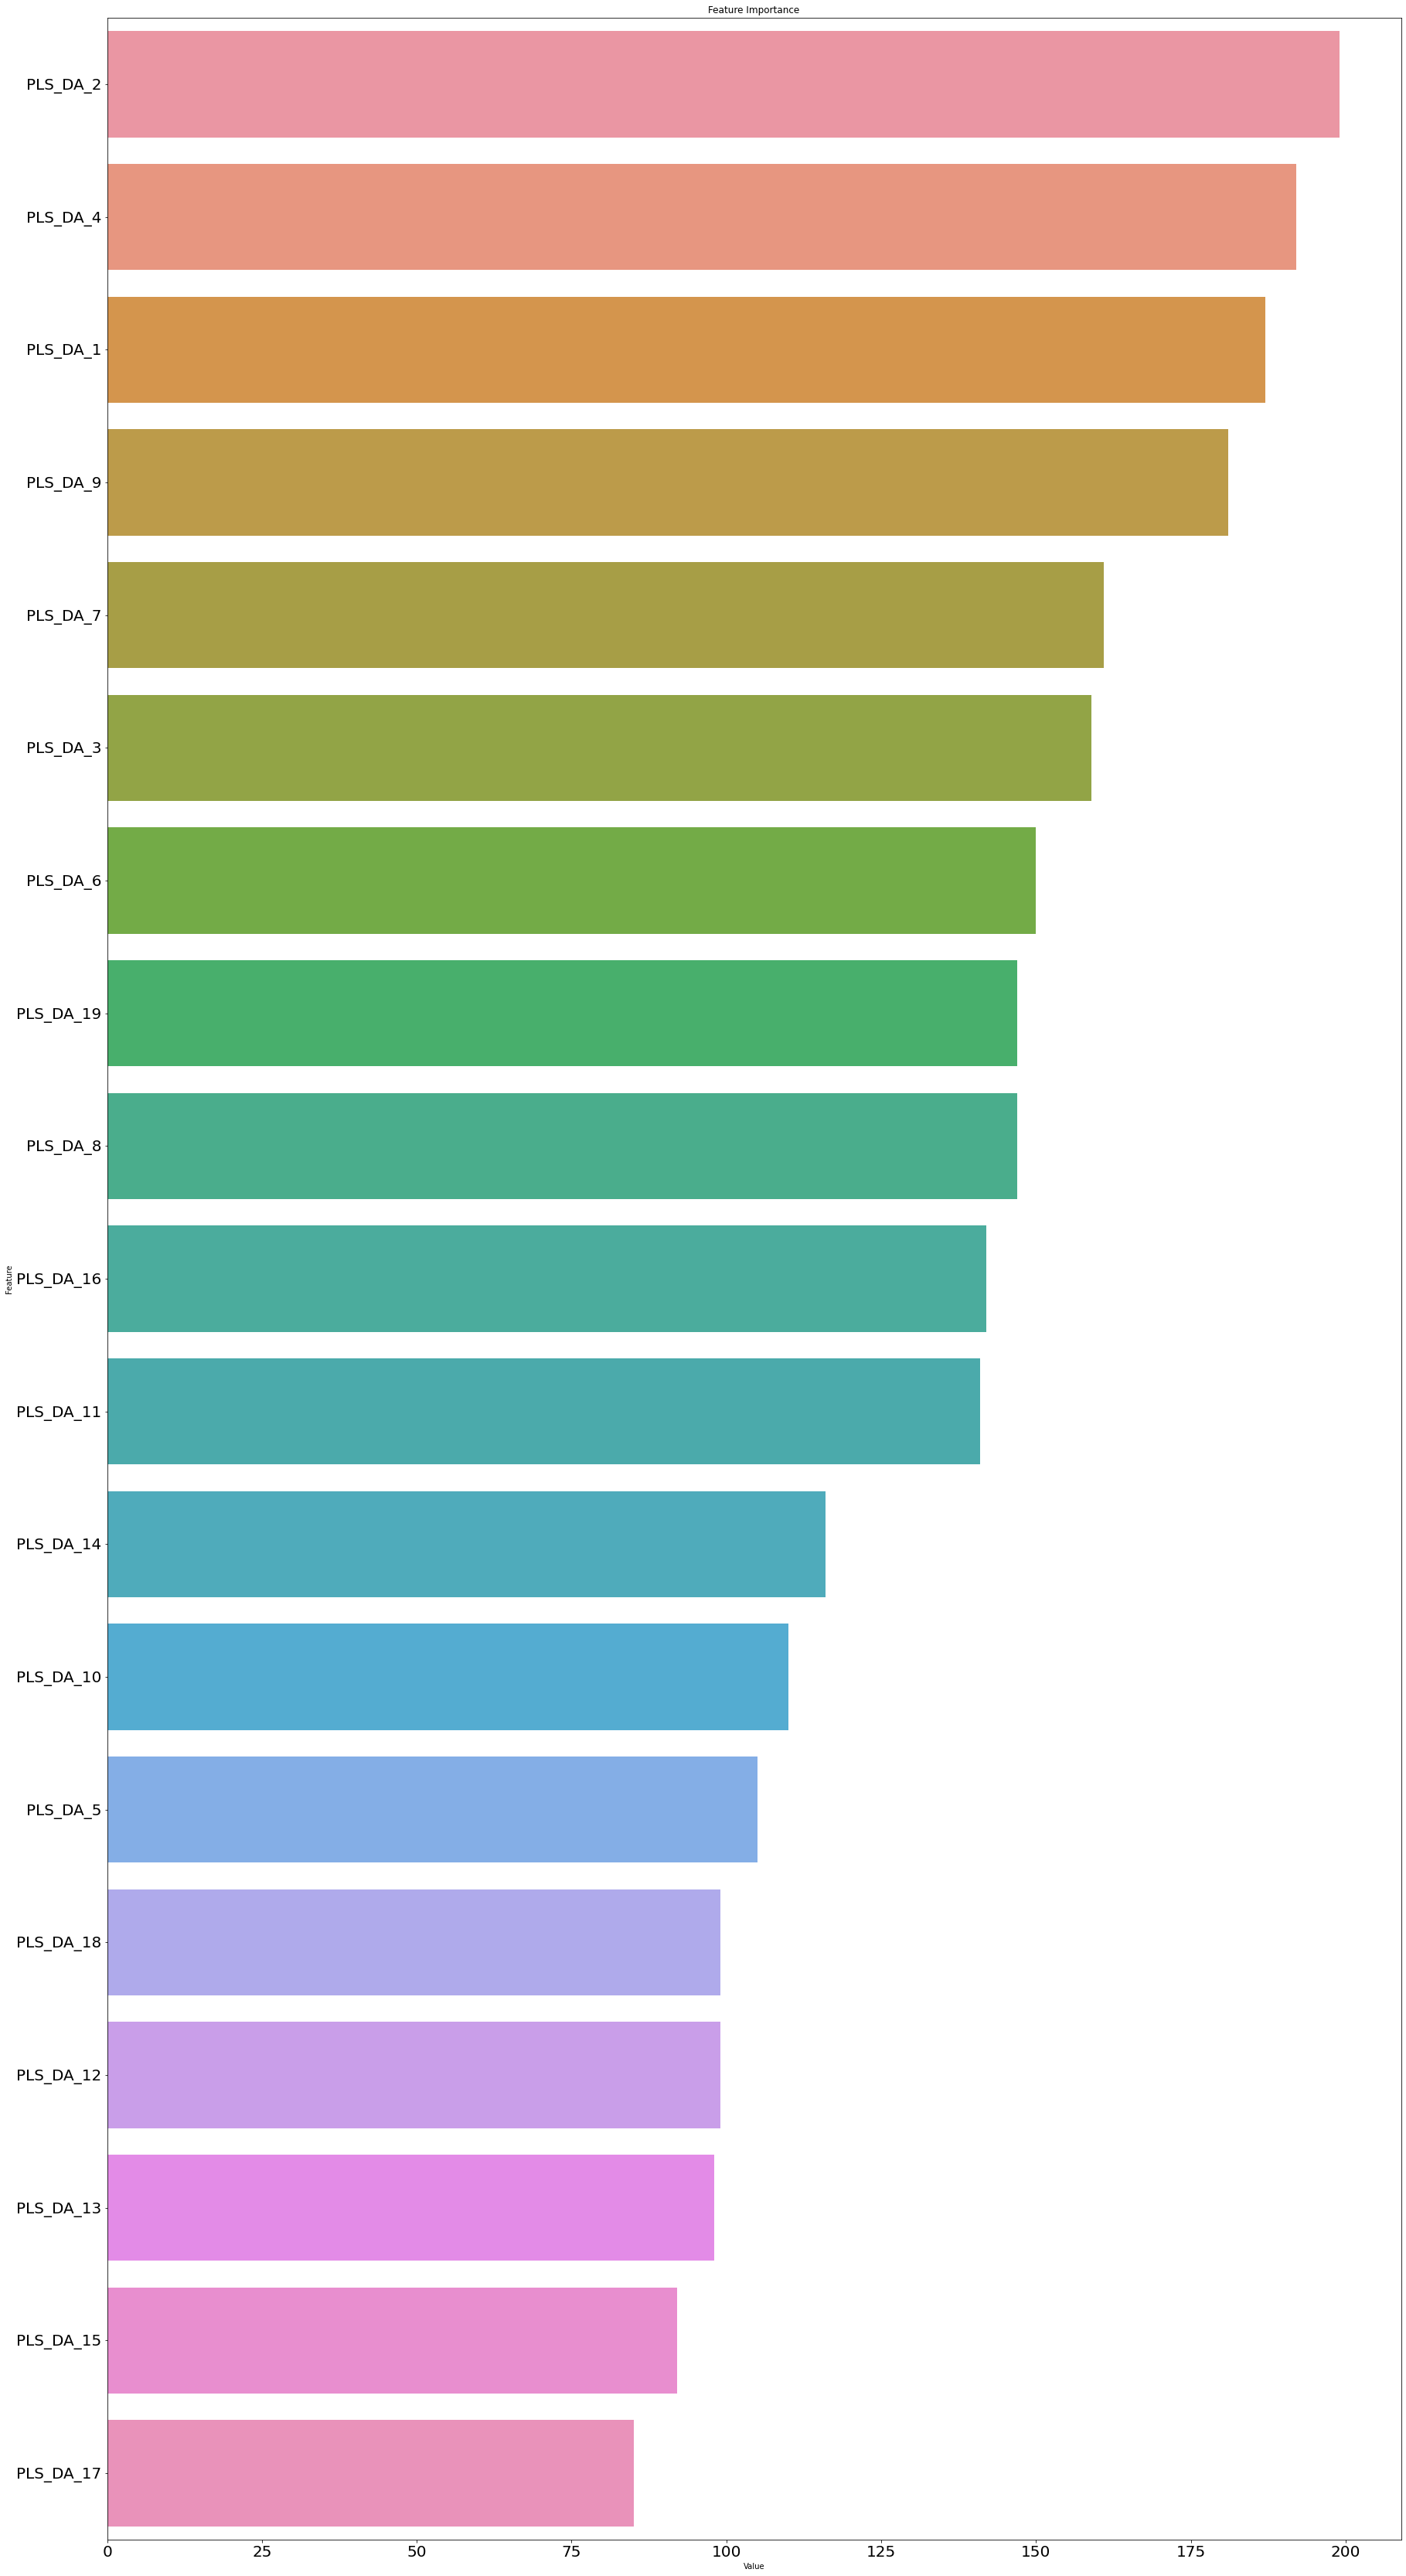

In [ ]:
from sklearn.metrics import make_scorer, balanced_accuracy_score, plot_confusion_matrix,f1_score,matthews_corrcoef
import optuna

best_score = 1
max_evals = 10

"""
OPTUNA_EARLY_STOPING = 10

class EarlyStoppingExceeded(optuna.exceptions.OptunaError):
    early_stop = OPTUNA_EARLY_STOPING
    early_stop_count = 0
    best_score = None

def early_stopping_opt(study, trial):
    if EarlyStoppingExceeded.best_score == None:
        EarlyStoppingExceeded.best_score = study.best_value

    if study.best_value < EarlyStoppingExceeded.best_score:
        EarlyStoppingExceeded.best_score = study.best_value
        EarlyStoppingExceeded.early_stop_count = 0
    else:
        if EarlyStoppingExceeded.early_stop_count > EarlyStoppingExceeded.early_stop:
            EarlyStoppingExceeded.early_stop_count = 0
            best_score = None
            raise EarlyStoppingExceeded()
        else:
            EarlyStoppingExceeded.early_stop_count=EarlyStoppingExceeded.early_stop_count+1
    #print(f'EarlyStop counter: {EarlyStoppingExceeded.early_stop_count}, Best score: {study.best_value} and {EarlyStoppingExceeded.best_score}')
    return
"""


import lightgbm as lgb


# FYI: Objective functions can take additional arguments
def objective(trial):
    global best_score
    
#{'boosting_type' : trial.suggest_categorical("boosting_type", ["gbdt", "rf", "dart", "goss"]),
    param= {'num_leaves': trial.suggest_int("num_leaves", 2,100),
            'learning_rate': trial.suggest_float("learning_rate",0.001,0.99),
            'max_depth': trial.suggest_int("max_depth", 2,100),

            'boosting_type' : trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),
            'n_estimators': trial.suggest_int("n_estimators", 2,100)}
        
        
        



    model = lgb.LGBMClassifier(**param)
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #score = sqrt(mean_squared_error(y_train, y_train_pred))
    #score = mean_absolute_error(y_train, y_train_pred)
    score = recall_score(y_train, y_train_pred)+recall_score(y_test, y_test_pred) 
    #score2 = matthews_corrcoef(y_test, y_test_pred)
    #score3 = f1_score(y_test, y_test_pred, average='macro')

    #y_pred = model.predict(X_test)
    #score = -np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    #score = np.sqrt(np.mean(np.square(y_train_pred - y_train)))
    #score = (score1 + score2)/2

    if (score > best_score):
        best_score = score
    return score



study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=max_evals)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Best Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

model = lgb.LGBMClassifier(random_state=1, max_depth = int(trial.params['max_depth']),
                                          learning_rate = float(trial.params['learning_rate']),
                                          num_leaves = int(trial.params['num_leaves']),
                                          boosting_type = str(trial.params['boosting_type']),
                                          n_estimators = int(trial.params['n_estimators']))

#boosting_type = str(trial.params['boosting_type'])


model.fit(X_train,y_train)



y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

                        
# view accuracy
#rmse_train = sqrt(mean_squared_error(y_pred_train, y_train))
#rmse_test = sqrt(mean_squared_error(y_pred_test, y_test))
#mae_train = mean_absolute_error(y_train, y_pred_train)
#mae_test = mean_absolute_error(y_test, y_pred_test)

#print('Model Train RMSE score: {0:0.4f}'.format(rmse_train))
#print('Model Test RMSE score: {0:0.4f}'.format(rmse_test))
#print('Model Train MAE score: {0:0.4f}'.format(mae_train))
#print('Model Test MAE score: {0:0.4f}'.format(mae_test))


#print('Mean of Dataset:')
#print(df[target].mean())
#print('Max Value of Dataset:')
#print(max(df[target]))
#print('Min Value of Dataset:')
#print(min(df[target]))

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_Cols)), columns=['Value','Feature'])
feature_imp = feature_imp.sort_values(by="Value", ascending=False)

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

plt.figure(figsize=(30, 60))
sns.barplot(x="Value", y="Feature", data=feature_imp[:100])
plt.title('Feature Importance')
plt.show()

filename = r'C:\Users\tay5bu\Desktop\Python_20\DataLeaksPhase1Last\LGBMClassifierModel150kNew1_40303030085'
import joblib
#save model
#joblib.dump(model, filename) 


Model accuracy score Test: 0.9996
Training-set accuracy score: 0.9997
Training set score: 0.9997
Test set score: 0.9996
Confusion matrix

 [[420668    330]
 [     0 420998]]

True Positives(TP) =  420668

True Negatives(TN) =  420998

False Positives(FP) =  330

False Negatives(FN) =  0
Balanced Accuracy Train
0.9996980385869274
Balanced Accuracy Test
0.9996080741476207
Train
F1 Score Macro
0.9996980385593944
F1 Score Micro
0.9996980385869275
F1 Score Weighted
0.9996980385593944
MCC Score 
0.9993962594251626
Test
F1 Score Macro
0.9996080740874185
F1 Score Micro
0.9996080741476207
F1 Score Weighted
0.9996080740874185
MCC Score 
0.9992164552663219


C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Confusion matrix, without normalization
[[420668    330]
 [     0 420998]]


C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Normalized confusion matrix
[[9.99e-01 7.84e-04]
 [0.00e+00 1.00e+00]]


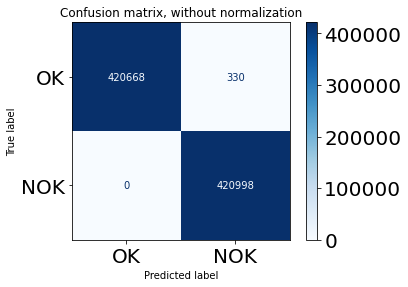

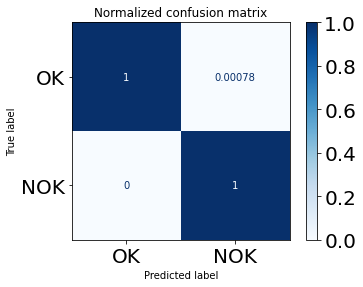

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    420998
           1       1.00      1.00      1.00    420998

    accuracy                           1.00    841996
   macro avg       1.00      1.00      1.00    841996
weighted avg       1.00      1.00      1.00    841996



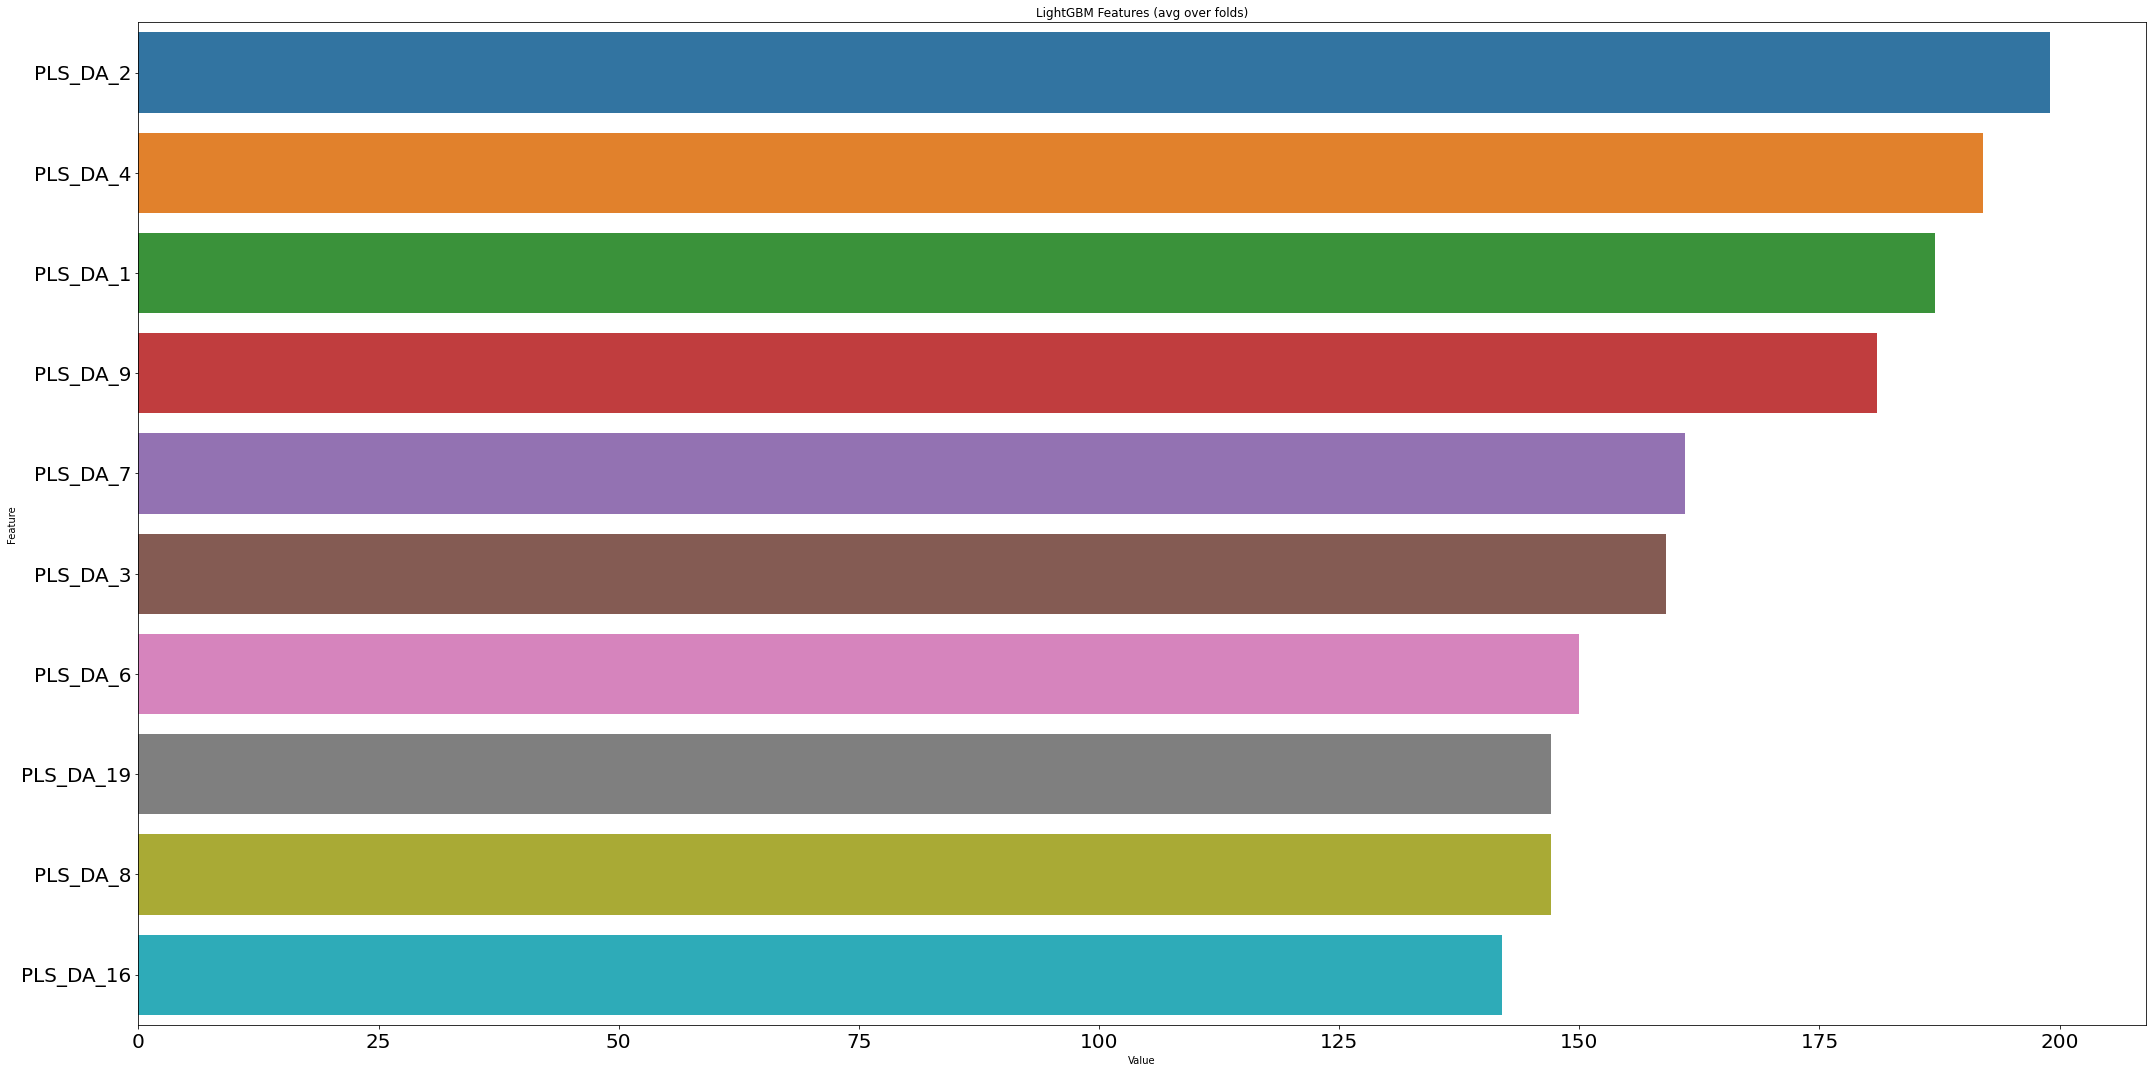

C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Confusion matrix, without normalization
[[1682973    1017]
 [      0 1683990]]


C:\Users\tay5bu\Desktop\Python_20\virtual_env_python3_10\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Normalized Train confusion matrix
[[9.99e-01 6.04e-04]
 [0.00e+00 1.00e+00]]


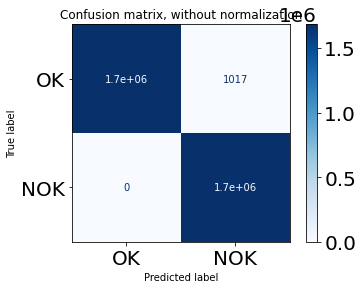

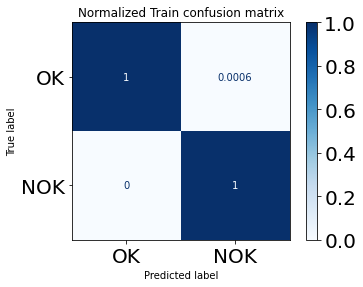

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# view accuracy 
from sklearn.metrics import accuracy_score
#accuracy=accuracy_score(y_pred_test, y_test)
print('Model accuracy score Test: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

y_pred_train = model.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

y_train_pred = model.predict(X_train)
print("Balanced Accuracy Train")
print(balanced_accuracy_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print("Balanced Accuracy Test")
print(balanced_accuracy_score(y_test, y_test_pred))
# visualize confusion matrix with seaborn heatmap

print("Train")
print("F1 Score Macro")
print(f1_score(y_train, y_train_pred, average='macro'))
print("F1 Score Micro")
print(f1_score(y_train, y_train_pred, average='micro'))  
print("F1 Score Weighted")
print(f1_score(y_train, y_train_pred, average='weighted')) 
print("MCC Score ")
print(matthews_corrcoef(y_train, y_train_pred)) 


print("Test")
print("F1 Score Macro")
print(f1_score(y_test, y_test_pred, average='macro'))
print("F1 Score Micro")
print(f1_score(y_test, y_test_pred, average='micro'))  
print("F1 Score Weighted")
print(f1_score(y_test, y_test_pred, average='weighted')) 
print("MCC Score ")
print(matthews_corrcoef(y_test, y_test_pred)) 



np.set_printoptions(precision=2)

class_names = ["OK" , "NOK"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))


# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_Cols)), columns=['Value','Feature'])
feature_imp = feature_imp.sort_values(by="Value", ascending=False)
plt.figure(figsize=(30, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp[:10])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()




#class_names = ["NOK" , "OK"]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized Train confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()